In [1]:
from tms_risk.utils.data import get_all_behavior
import seaborn as sns
import pingouin
import matplotlib.pyplot as plt

In [2]:
df = get_all_behavior(bids_folder='/data/ds-tmsrisk', all_tms_conditions=False)

/Users/gdehol/mambaforge/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:66: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


In [3]:
df.index.unique(level='subject').shape

(80,)

In [2]:
df = get_all_behavior(bids_folder='/data/ds-tmsrisk', all_tms_conditions=True)

/Users/gdehol/mambaforge/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:66: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


In [7]:
df.index.unique(level='subject').shape

(35,)

# Raw risky choice

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_77134/498752382.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.distplot(df.groupby(['subject', 'session']).mean()['chose_risky'])
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_77134/498752382.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.groupby(['subject', 'session']).mean()['chose_risky'])


<AxesSubplot: xlabel='chose_risky', ylabel='Density'>

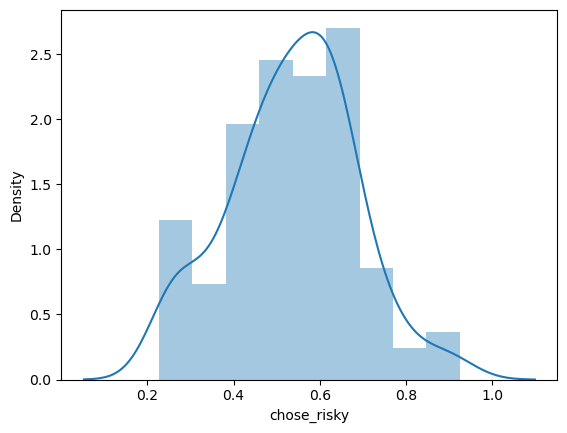

In [3]:
sns.distplot(df.groupby(['subject', 'session']).mean()['chose_risky'])

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_77134/3248821230.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fac = sns.catplot(x='stimulation_condition', y='chose_risky', data=df.groupby(['subject', 'stimulation_condition']).mean().reset_index(), kind='bar', ci=67)
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_77134/3248821230.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 67)` for the same effect.

  fac = sns.catplot(x='stimulation_condition', y='chose_risky', data=df.groupby(['subject', 'stimulation_condition']).mean().reset_index(), kind='bar', ci=67)


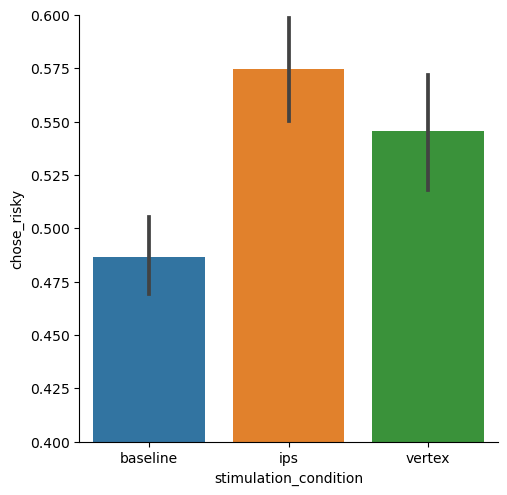

In [4]:
fac = sns.catplot(x='stimulation_condition', y='chose_risky', data=df.groupby(['subject', 'stimulation_condition']).mean().reset_index(), kind='bar', ci=67)
fac.set(ylim=(.4, .6))

In [5]:
tmp = df.groupby(['subject', 'stimulation_condition'])['chose_risky'].mean().unstack('stimulation_condition')

pingouin.ttest(tmp['ips'], tmp['vertex'], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.338824,34,two-sided,0.189511,"[-0.02, 0.07]",0.185599,0.411,0.187223


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_77134/1183439502.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.drop('baseline', level='stimulation_condition').groupby(['subject', 'stimulation_condition', 'session']).mean().reset_index()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_77134/1183439502.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 67)` for the same effect.

  fac = sns.catplot(x='stimulation_condition', y='chose_risky', col='session', data=tmp, kind='bar', ci=67,


,Source,SS,DF,MS,F,p-unc,np2
0,stimulation_condition,0.015690,1.0,0.015690,0.652640,0.422072,0.009792
1,session,0.012621,1.0,0.012621,0.524976,0.471288,0.007891
2,stimulation_condition * session,0.082390,1.0,0.082390,3.427164,0.068607,0.049363
3,Residual,1.586653,66.0,0.024040,NaN,NaN,NaN


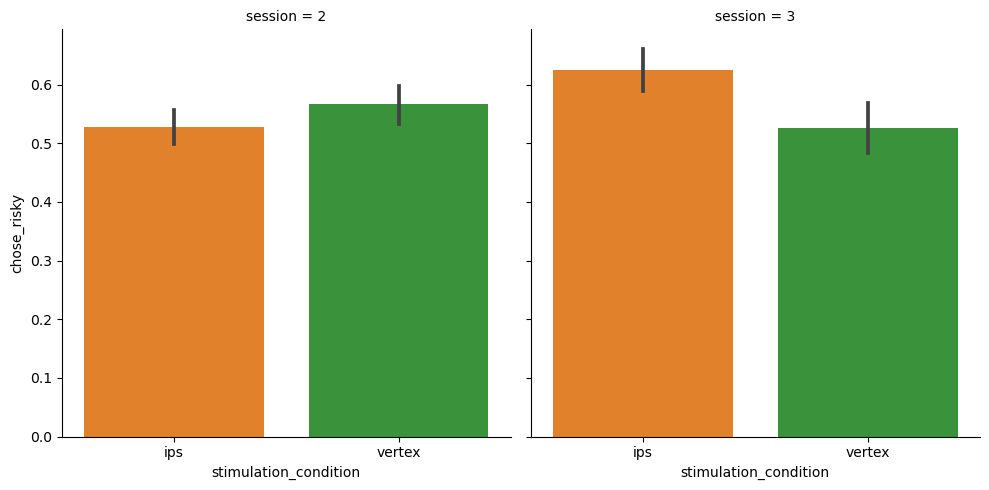

In [6]:
tmp = df.drop('baseline', level='stimulation_condition').groupby(['subject', 'stimulation_condition', 'session']).mean().reset_index()

fac = sns.catplot(x='stimulation_condition', y='chose_risky', col='session', data=tmp, kind='bar', ci=67,
palette=sns.color_palette()[1:])
# fac.set(ylim=(.4, .6))

pingouin.anova(tmp, dv='chose_risky', between=['stimulation_condition', 'session'], )

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_77134/3505991418.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fac = sns.catplot(x='stimulation_condition', y='rt', data=df.groupby(['subject', 'stimulation_condition']).median().reset_index(), kind='point', ci=67)
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_77134/3505991418.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 67)` for the same effect.

  fac = sns.catplot(x='stimulation_condition', y='rt', data=df.groupby(['subject', 'stimulation_condition']).median().reset_index(), kind='point', ci=67)


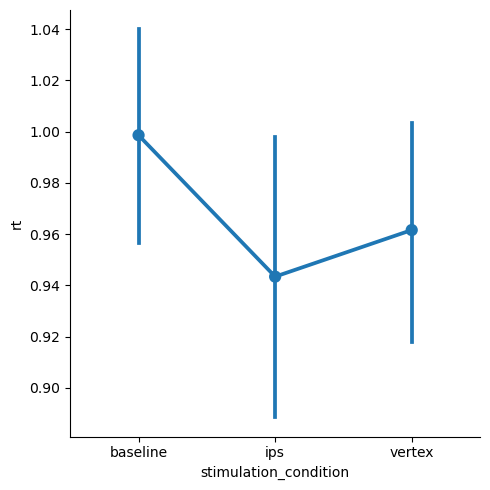

In [7]:
fac = sns.catplot(x='stimulation_condition', y='rt', data=df.groupby(['subject', 'stimulation_condition']).median().reset_index(), kind='point', ci=67)

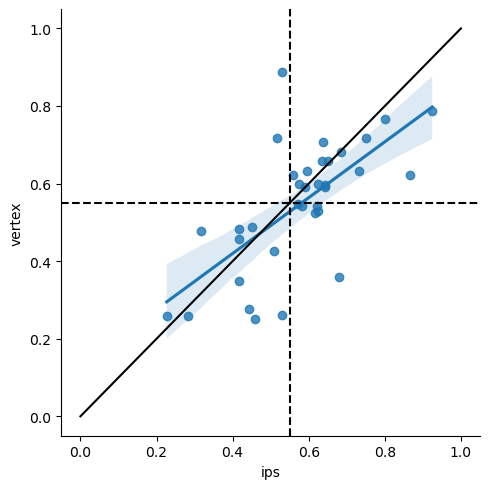

In [8]:
tmp = df.groupby(['subject', 'stimulation_condition'])['chose_risky'].mean().unstack('stimulation_condition')

pingouin.ttest(tmp['ips'], tmp['vertex'], paired=True)
sns.lmplot(x='ips', y='vertex', data=tmp)
plt.plot([0, 1.], [0, 1.], c='k')
plt.axvline(.55, c='k', ls='--')
plt.axhline(.55, c='k', ls='--')

In [9]:
pingouin.linear_regression(tmp['ips'], tmp['vertex'], add_intercept=False)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,ips,0.934818,0.035972,25.987055,5.173918e-24,0.952067,0.950657,0.861713,1.007923


# Raw risky choice x risky_first

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_77134/3427190866.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.groupby(['subject', 'stimulation_condition', 'risky_first']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_77134/3427190866.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 67)` for the same effect.

  sns.catplot(y='chose_risky', hue='stimulation_condition', x='risky_first', data=tmp.reset_index(), kind='point', ci=67)


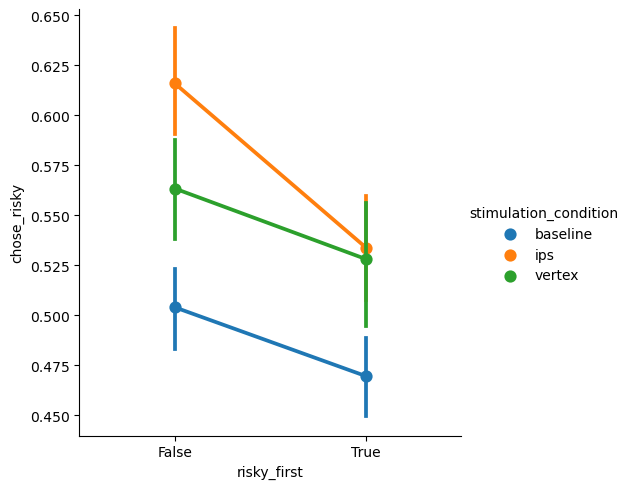

In [10]:
tmp = df.groupby(['subject', 'stimulation_condition', 'risky_first']).mean()

sns.catplot(y='chose_risky', hue='stimulation_condition', x='risky_first', data=tmp.reset_index(), kind='point', ci=67)

In [11]:
tmp = df.groupby(['subject', 'stimulation_condition', 'risky_first']).mean()
pingouin.rm_anova(tmp.drop('baseline', 0, level='stimulation_condition').reset_index(), 'chose_risky', within=['risky_first', 'stimulation_condition'], subject='subject')



/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_77134/395853656.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.groupby(['subject', 'stimulation_condition', 'risky_first']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_77134/395853656.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pingouin.rm_anova(tmp.drop('baseline', 0, level='stimulation_condition').reset_index(), 'chose_risky', within=['risky_first', 'stimulation_condition'], subject='subject')
/Users/gdehol/mambaforge/lib/python3.10/site-packages/pingouin/distribution.py:481: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included 

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,risky_first,0.120497,1,34,0.120497,10.224865,0.002993,0.002993,0.029971,1.0
1,stimulation_condition,0.029779,1,34,0.029779,1.792365,0.189522,0.189522,0.007578,1.0
2,risky_first * stimulation_condition,0.019162,1,34,0.019162,4.999731,0.032022,0.032022,0.004889,1.0


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_77134/80171297.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 67)` for the same effect.

  sns.catplot(x='bin(risky/safe)', y='chose_risky', hue='stimulation_condition', data=tmp.reset_index(), kind='point', ci=67)


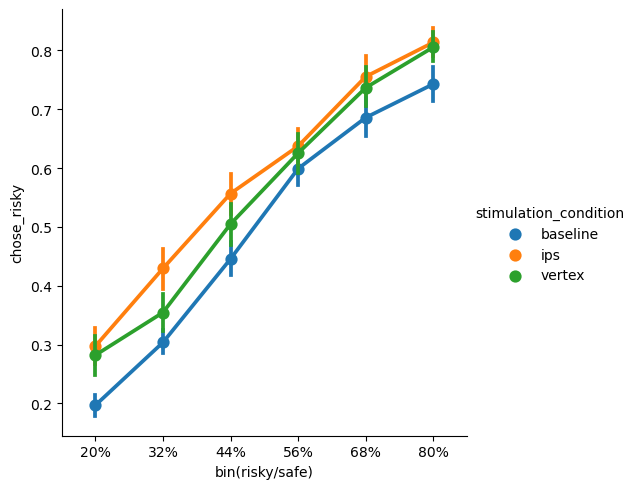

In [12]:
tmp = df.groupby(['subject', 'stimulation_condition', 'bin(risky/safe)']).mean()

sns.catplot(x='bin(risky/safe)', y='chose_risky', hue='stimulation_condition', data=tmp.reset_index(), kind='point', ci=67)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_77134/280733706.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 67)` for the same effect.

  sns.catplot(x='bin(risky/safe)', y='chose_risky', hue='stimulation_condition', col='risky_first', data=tmp.reset_index(), kind='point', ci=67)


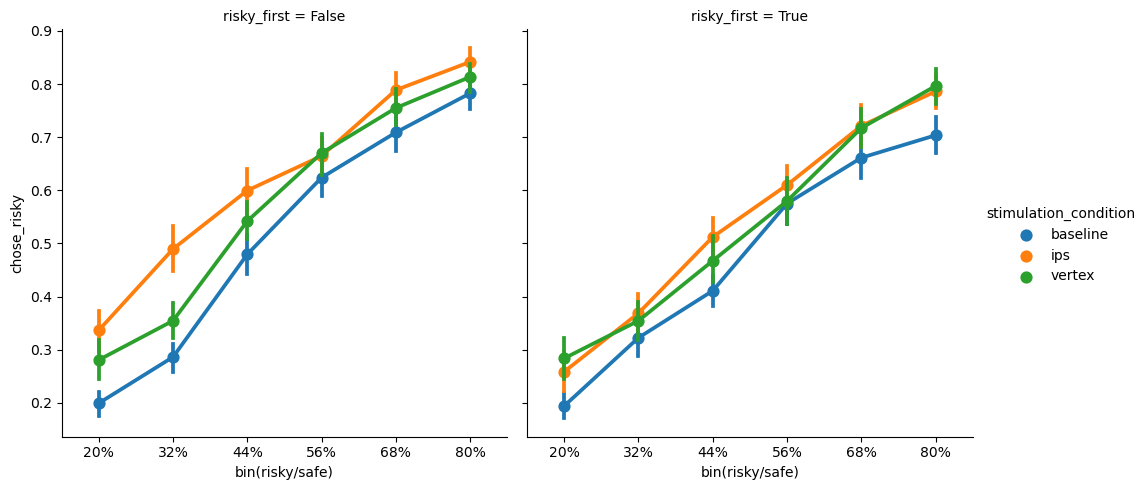

In [13]:
tmp = df.groupby(['subject', 'stimulation_condition', 'risky_first', 'bin(risky/safe)']).mean()

sns.catplot(x='bin(risky/safe)', y='chose_risky', hue='stimulation_condition', col='risky_first', data=tmp.reset_index(), kind='point', ci=67)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_77134/110103595.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.groupby(['subject', 'stimulation_condition', 'risky_first', 'n_safe']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_77134/110103595.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 67)` for the same effect.

  sns.catplot(x='n_safe', y='chose_risky', hue='stimulation_condition', col='risky_first', data=tmp.reset_index(), kind='point', ci=67)


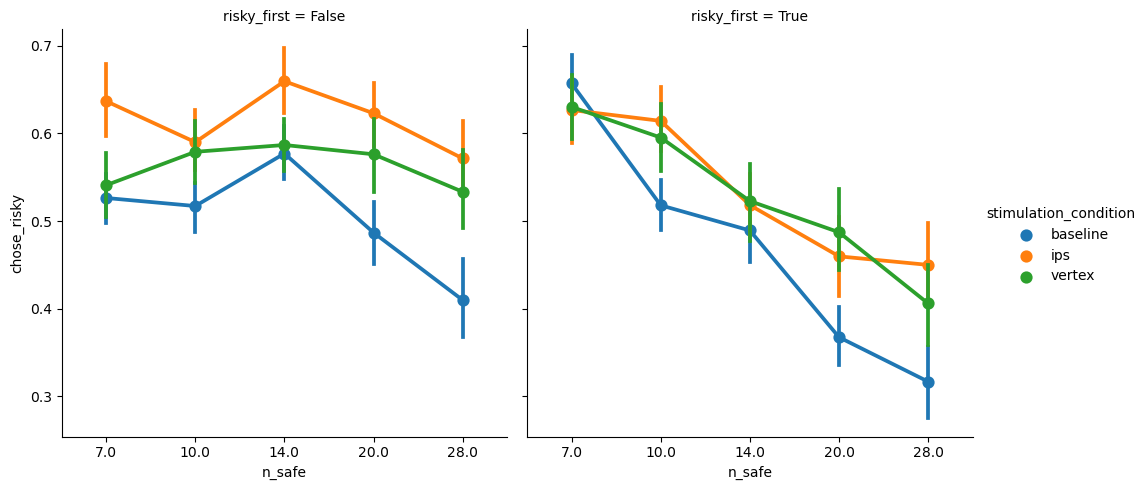

In [14]:
tmp = df.groupby(['subject', 'stimulation_condition', 'risky_first', 'n_safe']).mean()

sns.catplot(x='n_safe', y='chose_risky', hue='stimulation_condition', col='risky_first', data=tmp.reset_index(), kind='point', ci=67)

In [15]:
import pingouin

In [16]:
tmp['chose_risky'].unstack('stimulation_condition')

stimulation_condition       baseline       ips    vertex
subject risky_first n_safe                              
1       False       7.0     0.583333  0.750000  0.636364
                    10.0    0.250000  0.750000  0.333333
                    14.0    0.416667  0.583333  0.583333
                    20.0    0.416667  0.666667  0.583333
                    28.0    0.500000  0.583333  0.666667
...                              ...       ...       ...
74      True        7.0     0.666667  0.666667  0.333333
                    10.0    0.666667  0.416667  0.333333
                    14.0    0.583333  0.333333  0.166667
                    20.0    0.333333  0.250000  0.333333
                    28.0    0.166667  0.083333  0.333333

[350 rows x 3 columns]

In [17]:
tmp['chose_risky'].unstack('stimulation_condition').groupby(['bin(risky/safe)', 'risky_first']).apply(lambda d: pingouin.ttest(d['vertex'], d['ips'], paired=True))

KeyError: 'bin(risky/safe)'

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_27586/2617894703.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 67)` for the same effect.

  sns.catplot(x='bin(risky/safe)', y='rt', hue='stimulation_condition', col='risky_first', data=tmp.reset_index(), kind='point', ci=67)


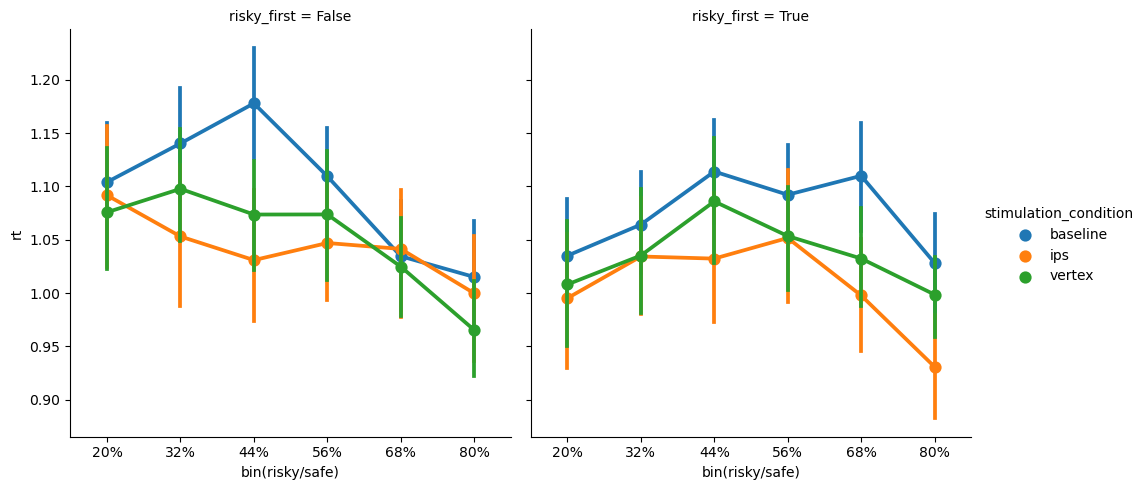

In [ ]:
tmp = df.groupby(['subject', 'stimulation_condition', 'risky_first', 'bin(risky/safe)']).mean()

sns.catplot(x='bin(risky/safe)', y='rt', hue='stimulation_condition', col='risky_first', data=tmp.reset_index(), kind='point', ci=67)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_27586/3723513800.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.groupby(['subject', 'stimulation_condition', 'risky_first', 'n_safe', 'chose_risky']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_27586/3723513800.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 67)` for the same effect.

  sns.catplot(x='n_safe', y='rt', hue='stimulation_condition', col='risky_first', data=tmp.reset_index(), kind='point', ci=67, row='chose_risky')


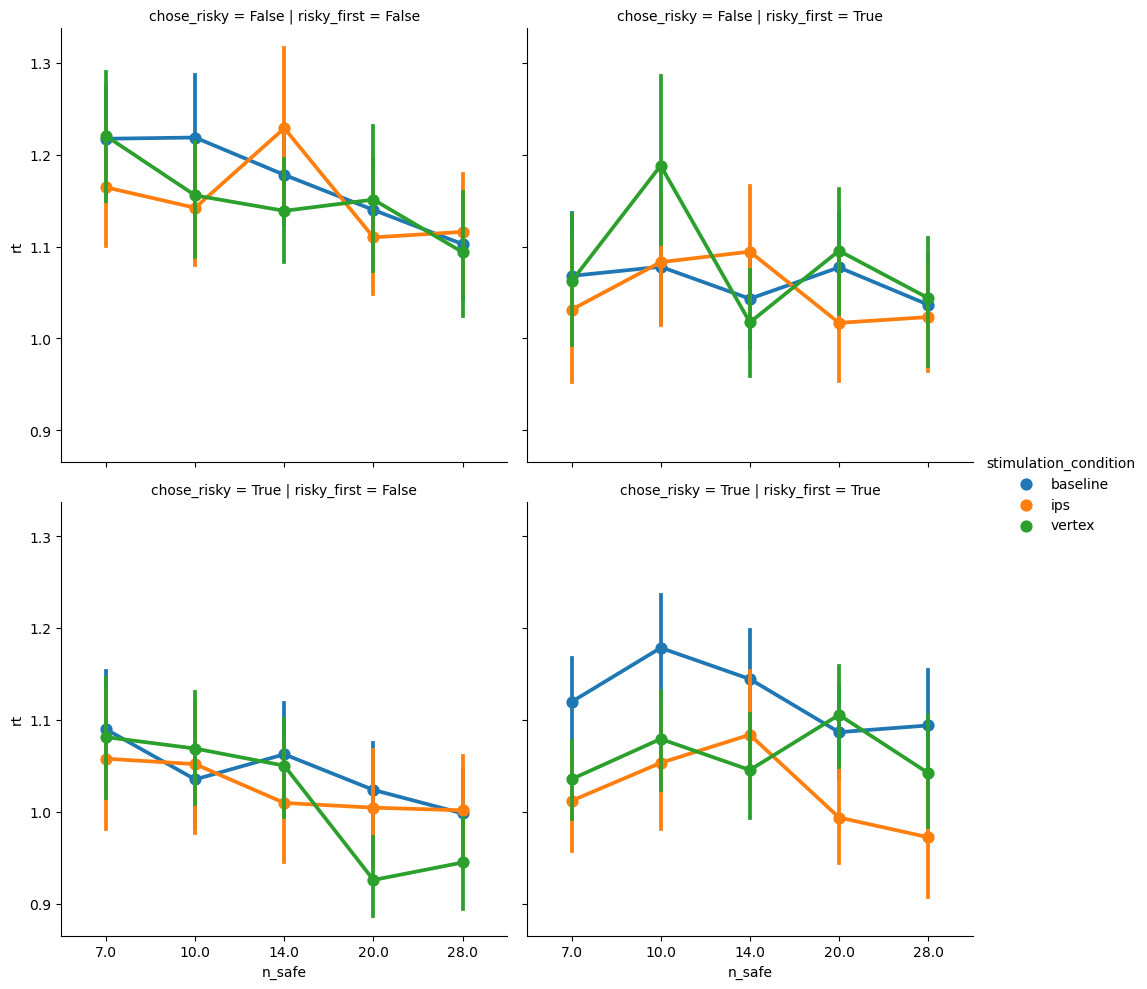

In [ ]:
tmp = df.groupby(['subject', 'stimulation_condition', 'risky_first', 'n_safe', 'chose_risky']).mean()

sns.catplot(x='n_safe', y='rt', hue='stimulation_condition', col='risky_first', data=tmp.reset_index(), kind='point', ci=67, row='chose_risky')